In [1]:
import xlrd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# temperature
temp = ctrl.Antecedent(np.arange(20, 40, .01), 'temp')

# wind speed
windSpeed = ctrl.Antecedent(np.arange(0, 100, .01), 'windSpeed')

# precipitation
prec = ctrl.Antecedent(np.arange(0, 100, .01), 'prec')

# number of cases
cases = ctrl.Consequent(np.arange(1, 10, .1), 'cases')

C:\Users\Matthew\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


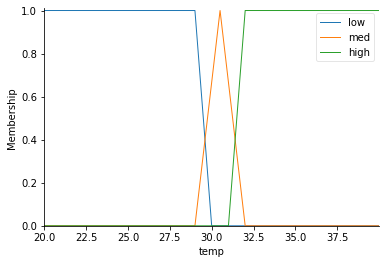

In [3]:
# temperature membership functions

temp['low'] = fuzz.trapmf(temp.universe, [20, 20, 29, 30])
temp['med'] = fuzz.trimf(temp.universe, [29, 30.5, 32])
temp['high'] = fuzz.trapmf(temp.universe, [31, 32, 40, 40])

temp.view()


C:\Users\Matthew\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


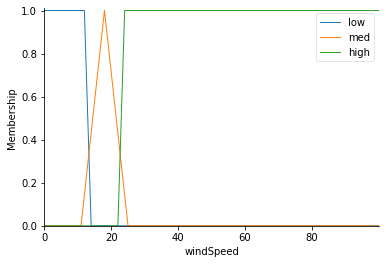

In [4]:
# wind speed membership functions

windSpeed['low'] = fuzz.trapmf(windSpeed.universe, [0, 0, 12, 14])
windSpeed['med'] = fuzz.trimf(windSpeed.universe, [11, 18, 25])
windSpeed['high'] = fuzz.trapmf(windSpeed.universe, [22, 24, 100, 100])

windSpeed.view()

C:\Users\Matthew\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


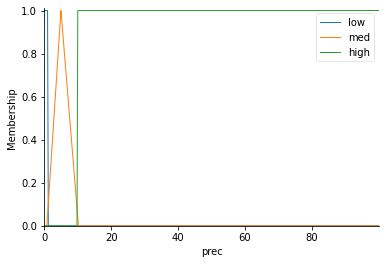

In [5]:
# precipitation membership functions

prec['low'] = fuzz.trapmf(prec.universe, [0, 0, 1, 1.2])
prec['med'] = fuzz.trimf(prec.universe, [0.8, 5, 10.2])
prec['high'] = fuzz.trapmf(prec.universe, [9.8, 10, 100, 100])

prec.view()

C:\Users\Matthew\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


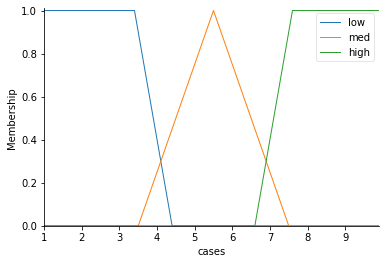

In [6]:
# number of cases membership functions

cases['low'] = fuzz.trapmf(cases.universe, [1, 1, 3.4, 4.4])
cases['med'] = fuzz.trimf(cases.universe, [3.5, 5.5, 7.5])
cases['high'] = fuzz.trapmf(cases.universe, [6.6, 7.6, 10, 10])

cases.view()

In [7]:
# Simplified rules based on the fuzzy logic input-output table

rule1 = ctrl.Rule(((temp['low'] & windSpeed['low']) |
                   (temp['low'] & windSpeed['med'] & prec['low']) |
                   (temp['med'] & windSpeed['low'] & prec['low'])), cases['low'])

rule2 = ctrl.Rule(((temp['low'] & windSpeed['med'] & prec['med']) |
                   (temp['low'] & windSpeed['med'] & prec['high']) |
                   (temp['med'] & windSpeed['low'] & prec['med']) |
                   (temp['med'] & windSpeed['low'] & prec['high']) |
                   (temp['med'] & windSpeed['med']) |
                   (temp['high'] & windSpeed['low']) |
                   (temp['high'] & windSpeed['med'])), cases['med'])

rule3 = ctrl.Rule((windSpeed['high']), cases['high'])

In [8]:
decision_set_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
decision_set = ctrl.ControlSystemSimulation(decision_set_ctrl)

In [9]:
# Testing area - reads excel file dataset and produces output for each input set
loc = ("Project Dataset for Fuzzy Logic.xlsx")
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)

for x in range(1, 63):
    decision_set.input['temp'] = sheet.cell_value(x, 0)
    decision_set.input['windSpeed'] = sheet.cell_value(x, 1)
    decision_set.input['prec'] = sheet.cell_value(x, 2)

    decision_set.compute()

    print(str(x) + " - Cases: " + np.array2string(decision_set.output['cases']))

1 - Cases: 2.46436782
2 - Cases: 5.5
3 - Cases: 5.5
4 - Cases: 4.96745337
5 - Cases: 5.5
6 - Cases: 2.55656619
7 - Cases: 4.96745337
8 - Cases: 4.08598797
9 - Cases: 2.57830688
10 - Cases: 2.46548102
11 - Cases: 2.46436782
12 - Cases: 2.76019356
13 - Cases: 2.50554028
14 - Cases: 5.5
15 - Cases: 2.48891674
16 - Cases: 5.5
17 - Cases: 4.57699366
18 - Cases: 3.43382233
19 - Cases: 2.46436782
20 - Cases: 5.5
21 - Cases: 5.5
22 - Cases: 5.5
23 - Cases: 5.5
24 - Cases: 2.46436782
25 - Cases: 2.46436782
26 - Cases: 2.48891674
27 - Cases: 4.61389093
28 - Cases: 3.78740155
29 - Cases: 2.57830688
30 - Cases: 2.57393722
31 - Cases: 2.57393722
32 - Cases: 4.83011801
33 - Cases: 5.5
34 - Cases: 5.5
35 - Cases: 5.5
36 - Cases: 5.5
37 - Cases: 5.5
38 - Cases: 2.46436782
39 - Cases: 5.5
40 - Cases: 2.46436782
41 - Cases: 2.50554028
42 - Cases: 5.5
43 - Cases: 5.5
44 - Cases: 2.46436782
45 - Cases: 2.46436782
46 - Cases: 5.5
47 - Cases: 5.5
48 - Cases: 5.5
49 - Cases: 5.5
50 - Cases: 5.5
51 - Cases: 5

In [10]:
## Display of decision
# print("Cases: " + np.array2string(decision_set.output['cases']))
# cases.view(sim=decision_set)